# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Kevin M. Shandy
- Email: kevinshandy475@gmail.com
- Id Dicoding: Kevin Monica Shandy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [111]:
# import libraries

import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Menyiapkan data yang akan diguankan

In [112]:
# Load the dataset

df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [113]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [114]:
# Missing value in dataset

df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [115]:
# Duplicated data Checking

df.duplicated().sum()

np.int64(0)

In [116]:
# Dataset statistic description (num_features)

df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


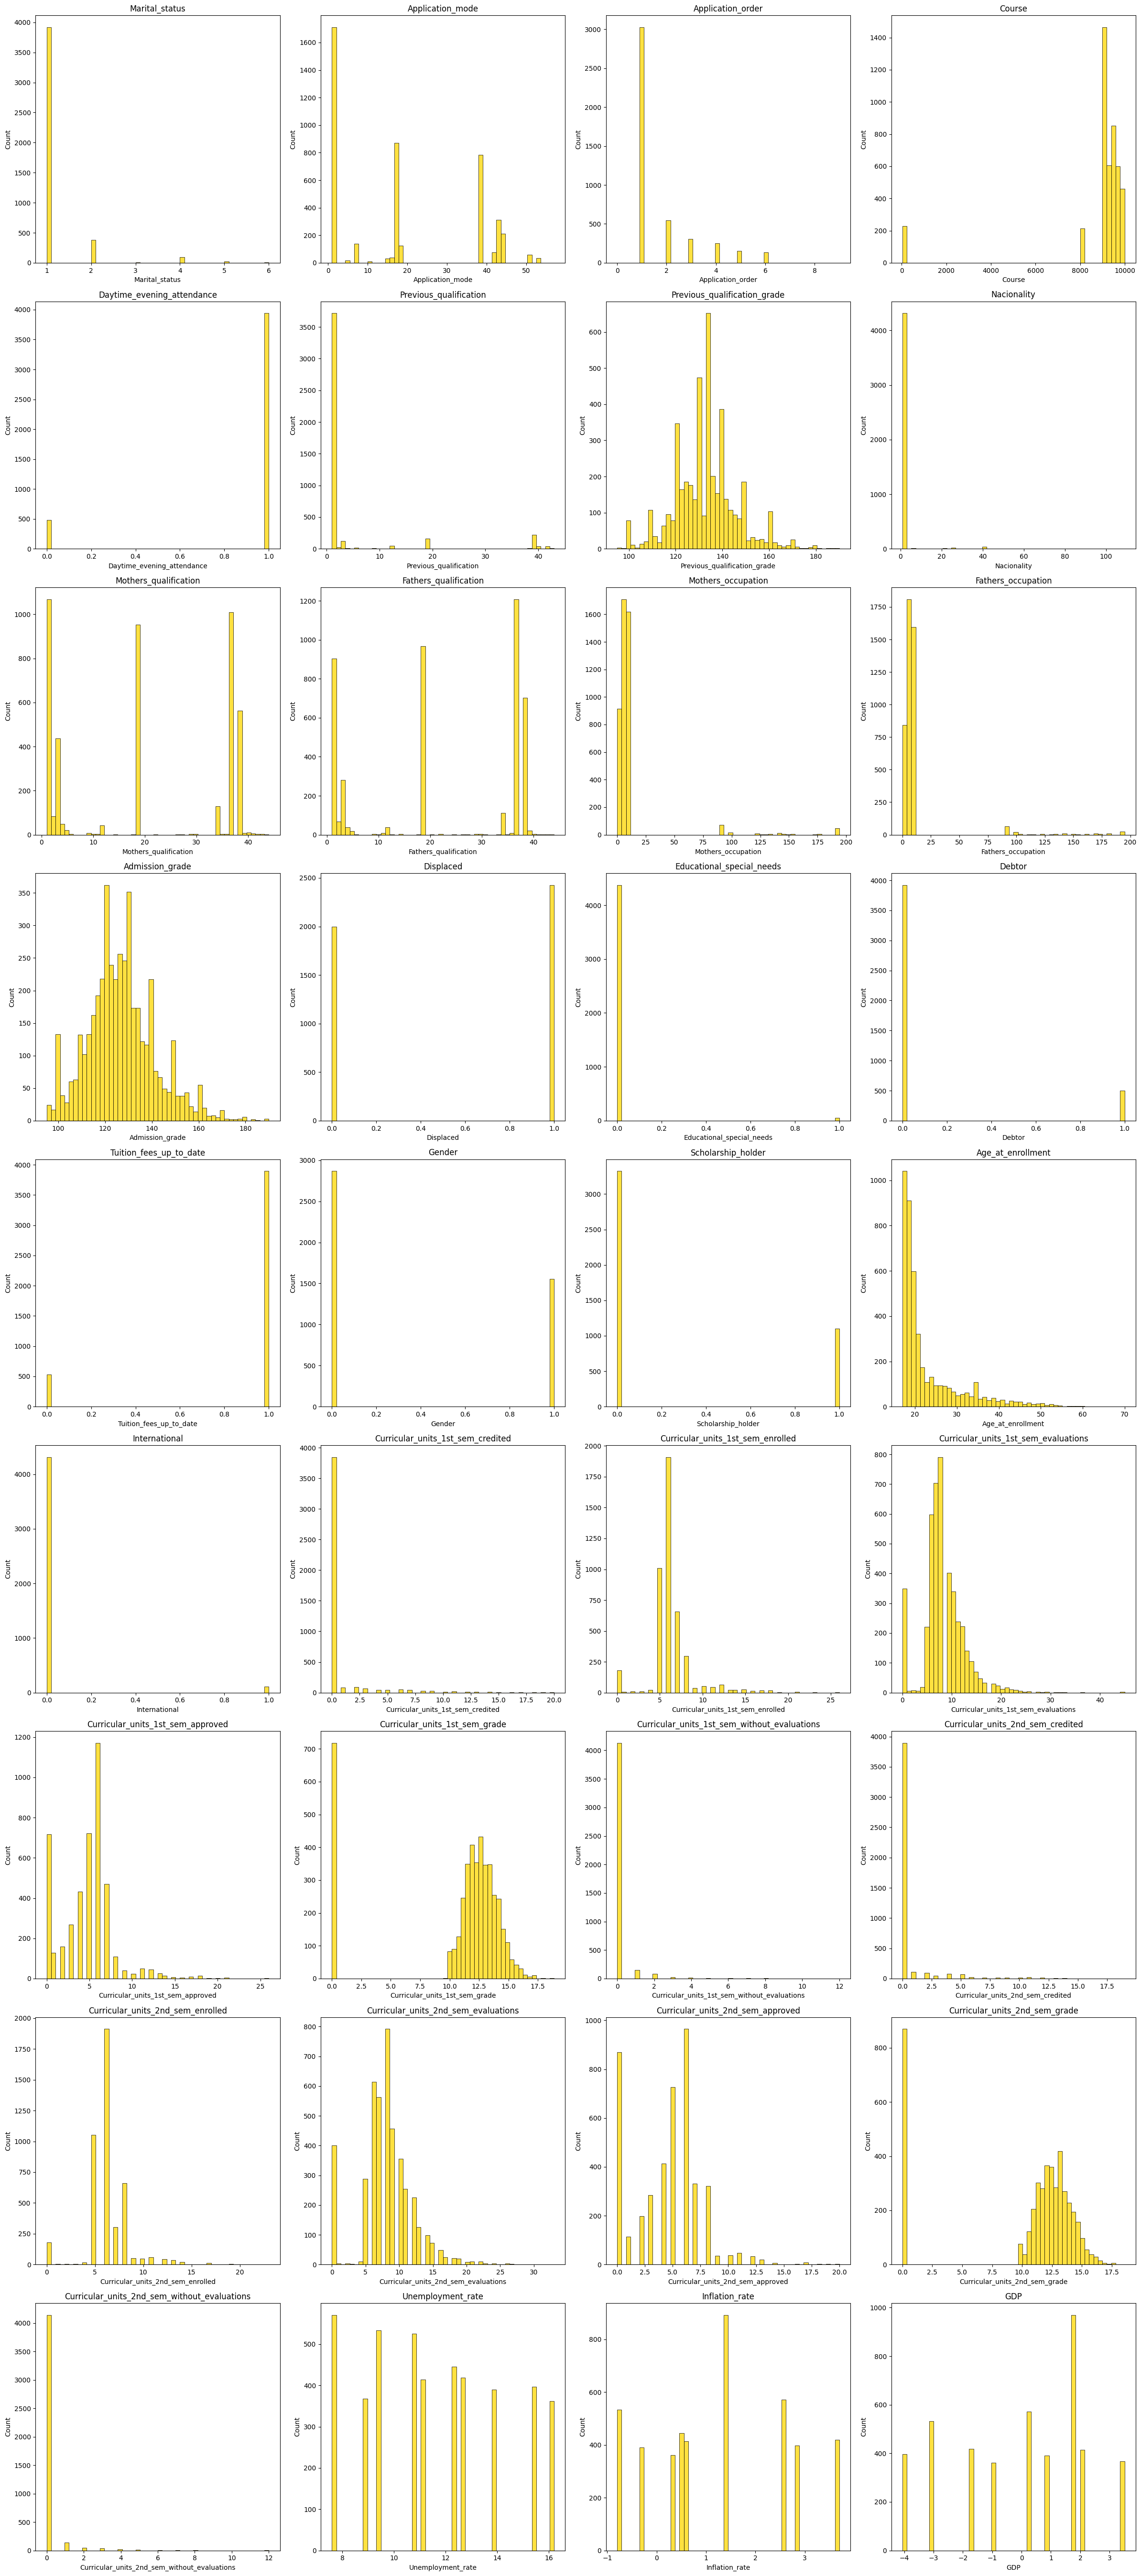

In [117]:
# Numerical features distribution

def visualisasi_histogram(df):
    num_features = df.select_dtypes(include=['number']).columns
    num_plots = len(num_features)
    num_rows = (num_plots + 3) // 4

    fig, axes = plt.subplots(num_rows, 4, figsize=(24, num_rows * 6))

    for i, col in enumerate(num_features):
        row = i // 4
        col_num = i % 4
        sns.histplot(x=col, data=df, bins=50, ax=axes[row, col_num], color='gold')
        axes[row, col_num].set_title(col)

    plt.tight_layout()
    plt.show()

visualisasi_histogram(df)

## Data Preparation / Preprocessing

### Preparation for Dashboard

In [118]:
df_new = df.copy()

In [119]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Marital_status: The marital status of the student. (Categorical)

1 - single

2 – married


3 – widower

4 – divorced

5 – facto union

6 – legally separated

In [120]:
print(df['Marital_status'].value_counts())
print('Unique value counts: ', df['Marital_status'].nunique())

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Unique value counts:  6


In [121]:
def Marital_status(x):
    if x == 1:
        return 'single'
    elif x == 2:
        return 'married'
    elif x == 3:
        return 'widower'
    elif x == 4:
        return 'divorced'
    elif x == 5:
        return 'facto union'
    elif x == 6:
        return 'legally separated'
    else:
        return 'Unknown'

df_new['Marital_status'] = df_new['Marital_status'].apply(Marital_status)

In [122]:
print(df_new['Marital_status'].value_counts())
print('Unique value counts: ', df_new['Marital_status'].nunique())

Marital_status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64
Unique value counts:  6


Application_mode: The method of application used by the student. (Categorical)

1 - 1st phase - general contingent

2 - Ordinance No. 612/93

5 - 1st phase - special contingent (Azores Island)

7 - Holders of other higher courses

10 - Ordinance No. 854-B/99

15 - International student (bachelor)

16 - 1st phase - special contingent (Madeira Island)

17 - 2nd phase - general contingent

18 - 3rd phase - general contingent

26 - Ordinance No. 533-A/99, item b2) (Different Plan)

27 - Ordinance No. 533-A/99, item b3 (Other Institution)

39 - Over 23 years old

42 - Transfer

43 - Change of course

44 - Technological specialization diploma holders

51 - Change of institution/course

53 - Short cycle diploma holders

57 - Change of institution/course (International)

In [123]:
print(df['Application_mode'].value_counts())
print('Unique value counts: ', df['Application_mode'].nunique())

Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
Unique value counts:  18


In [124]:
def Application_mode(x):
    if x == 1:
        return '1st phase - general contingent'
    elif x == 2:
        return 'Ordinance No. 612/93'
    elif x == 5:
        return '1st phase - special contingent (Azores Island)'
    elif x == 7:
        return 'Holders of other higher courses'
    elif x == 10:
        return 'Ordinance No. 854-B/99'
    elif x == 15:
        return 'International student (bachelor)'
    elif x == 16:
        return '1st phase - special contingent (Madeira Island)'
    elif x == 17:
        return '2nd phase - general contingent'
    elif x == 18:
        return '3rd phase - general contingent'
    elif x == 26:
        return 'Ordinance No. 533-A/99, item b2)'
    elif x == 27:
        return 'Ordinance No. 533-A/99, item b3'
    elif x == 39:
        return 'Over 23 years old'
    elif x == 42:
        return 'Transfer'
    elif x == 43:
        return 'Change of course'
    elif x == 44:
        return 'Technological specialization diploma holders'
    elif x == 51:
        return 'Change of institution/course'
    elif x == 53:
        return 'Short cycle diploma holders'
    elif x == 57:
        return 'Change of institution/course (International)'
    else:
        return 'Unknown'

df_new['Application_mode'] = df_new['Application_mode'].apply(Application_mode)

In [125]:
print(df_new['Application_mode'].value_counts())
print('Unique value counts: ', df_new['Application_mode'].nunique())

Application_mode
1st phase - general contingent                     1708
2nd phase - general contingent                      872
Over 23 years old                                   785
Change of course                                    312
Technological specialization diploma holders        213
Holders of other higher courses                     139
3rd phase - general contingent                      124
Transfer                                             77
Change of institution/course                         59
1st phase - special contingent (Madeira Island)      38
Short cycle diploma holders                          35
International student (bachelor)                     30
1st phase - special contingent (Azores Island)       16
Ordinance No. 854-B/99                               10
Ordinance No. 612/93                                  3
Change of institution/course (International)          1
Ordinance No. 533-A/99, item b2)                      1
Ordinance No. 533-A/99, item b3

Course: The course taken by the student. (Categorical)

33 - Biofuel Production Technologies

171 - Animation and Multimedia Design

8014 - Social Service (evening attendance)

9003 - Agronomy

9070 - Communication Design

9085 - Veterinary Nursing

9119 - Informatics Engineering

9130 - Equinculture

9147 - Management

9238 - Social Service

9254 - Tourism

9500 - Nursing

9556 - Oral Hygiene

9670 - Advertising and Marketing Management

9773 - Journalism and Communication

9853 - Basic Education

9991 - Management (evening attendance)

In [126]:
print(df['Course'].value_counts())
print('Unique value counts: ', df['Course'].nunique())

Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Unique value counts:  17


In [127]:
def Course(x):
    if x == 33:
        return 'Biofuel Production Technologies'
    elif x == 171:
        return 'Animation and Multimedia Design'
    elif x == 8014:
        return 'Social Service (evening attendance)'
    elif x == 9003:
        return 'Agronomy'
    elif x == 9070:
        return 'Communication Design'
    elif x == 9085:
        return 'Veterinary Nursing'
    elif x == 9119:
        return 'Informatics Engineering'
    elif x == 9130:
        return 'Equinculture'
    elif x == 9147:
        return 'Management'
    elif x == 9238:
        return 'Social Service'
    elif x == 9254:
        return 'Tourism'
    elif x == 9500:
        return 'Nursing'
    elif x == 9556:
        return 'Oral Hygiene'
    elif x == 9670:
        return 'Advertising and Marketing Management'
    elif x == 9773:
        return 'Journalism and Communication'
    elif x == 9853:
        return 'Basic Education'
    elif x == 9991:
        return 'Management (evening attendance)'
    else:
        return 'Unknown'

df_new['Course'] = df_new['Course'].apply(Course)

In [128]:
print(df_new['Course'].value_counts())
print('Unique value counts: ', df_new['Course'].nunique())

Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64
Unique value counts:  17


Daytime_evening_attendance: Whether the student attends classes during the day or in the evening. (Categorical)

1 – daytime

0 - evening

In [129]:
print(df['Daytime_evening_attendance'].value_counts())
print('Unique value counts: ', df['Daytime_evening_attendance'].nunique())

Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
Unique value counts:  2


In [130]:
def Daytime_evening_attendance(x):
    if x == 1:
        return 'daytime'
    elif x == 0:
        return 'evening'
    else:
        return 'Unknown'

df_new['Daytime_evening_attendance'] = df_new['Daytime_evening_attendance'].apply(Daytime_evening_attendance)

In [131]:
print(df_new['Daytime_evening_attendance'].value_counts())
print('Unique value counts: ', df_new['Daytime_evening_attendance'].nunique())

Daytime_evening_attendance
daytime    3941
evening     483
Name: count, dtype: int64
Unique value counts:  2


Previous_qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)

1 - Secondary education

2 - Higher education - bachelor's degree

3 - Higher education - degree

4 - Higher education - master's

5 - Higher education - doctorate

6 - Frequency of higher education

9 - 12th year of schooling - not completed

10 - 11th year of schooling - not completed

12 - Other - 11th year of schooling

14 - 10th year of schooling

15 - 10th year of schooling - not completed

19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.

38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.

39 - Technological specialization course

40 - Higher education - degree (1st cycle)

42 - Professional higher technical course

43 - Higher education - master (2nd cycle)

In [132]:
print(df['Previous_qualification'].value_counts())
print('Unique value counts: ', df['Previous_qualification'].nunique())

Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64
Unique value counts:  17


In [133]:
def Previous_qualification(x):
    if x == 1:
        return 'Secondary education'
    elif x == 2:
        return 'Higher education - bachelor\'s degree'
    elif x == 3:
        return 'Higher education - degree'
    elif x == 4:
        return 'Higher education - master'
    elif x == 5:
        return 'Higher education - doctorate'
    elif x == 6:
        return 'Frequency of higher education'
    elif x == 9:
        return '12th year of schooling - not completed'
    elif x == 10:
        return '11th year of schooling - not completed'
    elif x == 12:
        return 'Other - 11th year of schooling'
    elif x == 14:
        return '10th year of schooling'
    elif x == 15:
        return '10th year of schooling - not completed'
    elif x == 19:
        return 'Basic education 3rd cycle (9th/10th/11th year) or equiv.'
    elif x == 38:
        return 'Basic education 2nd cycle (6th/7th/8th year) or equiv.'
    elif x == 39:
        return 'Technological specialization course'
    elif x == 40:
        return 'Higher education - degree (1st cycle)'
    elif x == 42:
        return 'Professional higher technical course'
    elif x == 43:
        return 'Higher education - master (2nd cycle)'
    else:
        return 'Unknown'

df_new['Previous_qualification'] = df_new['Previous_qualification'].apply(Previous_qualification)

In [134]:
print(df_new['Previous_qualification'].value_counts())
print('Unique value counts: ', df_new['Previous_qualification'].nunique())

Previous_qualification
Secondary education                                         3717
Technological specialization course                          219
Basic education 3rd cycle (9th/10th/11th year) or equiv.     162
Higher education - degree                                    126
Other - 11th year of schooling                                45
Higher education - degree (1st cycle)                         40
Professional higher technical course                          36
Higher education - bachelor's degree                          23
Frequency of higher education                                 16
12th year of schooling - not completed                        11
Higher education - master                                      8
Basic education 2nd cycle (6th/7th/8th year) or equiv.         7
Higher education - master (2nd cycle)                          6
11th year of schooling - not completed                         4
10th year of schooling - not completed                         2
Hi

Nacionality: The nationality of the student. (Categorical)

1 - Portuguese

2 - German

6 - Spanish

11 - Italian

13 - Dutch

14 - English

17 - Lithuanian

21 - Angolan

22 - Cape Verdean

24 - Guinean

25 - Mozambican

26 - Santomean

32 - Turkish

41 - Brazilian

62 - Romanian

100 - Moldova (Republic of)

101 - Mexican

103 - Ukrainian

105 - Russian

108 - Cuban

109 - Colombian

In [135]:
print(df['Nacionality'].value_counts())
print('Unique value counts: ', df['Nacionality'].nunique())

Nacionality
1      4314
41       38
26       14
6        13
22       13
24        5
100       3
11        3
103       3
62        2
21        2
101       2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64
Unique value counts:  21


In [136]:
def Nacionality(x):
    if x == 1:
        return 'Portuguese'
    elif x == 2:
        return 'German'
    elif x == 6:
        return 'Spanish'
    elif x == 11:
        return 'Italian'
    elif x == 13:
        return 'Dutch'
    elif x == 14:
        return 'English'
    elif x == 17:
        return 'Lithuanian'
    elif x == 21:
        return 'Angolan'
    elif x == 22:
        return 'Cape Verdean'
    elif x == 24:
        return 'Guinean'
    elif x == 25:
        return 'Mozambican'
    elif x == 26:
        return 'Santomean'
    elif x == 32:
        return 'Turkish'
    elif x == 41:
        return 'Brazilian'
    elif x == 62:
        return 'Romanian'
    elif x == 100:
        return 'Moldova (Republic of)'
    elif x == 101:
        return 'Mexican'
    elif x == 103:
        return 'Ukrainian'
    elif x == 105:
        return 'Russian'
    elif x == 108:
        return 'Cuban'
    elif x == 109:
        return 'Colombian'
    else:
        return 'Unknown'

df_new['Nacionality'] = df_new['Nacionality'].apply(Nacionality)

In [137]:
print(df_new['Nacionality'].value_counts())
print('Unique value counts: ', df_new['Nacionality'].nunique())

Nacionality
Portuguese               4314
Brazilian                  38
Santomean                  14
Spanish                    13
Cape Verdean               13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Romanian                    2
Angolan                     2
Mexican                     2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64
Unique value counts:  21


Mothers_qualification: The qualification of the student's mother. (Categorical)

1 - Secondary Education - 12th Year of Schooling or Eq.

2 - Higher Education - Bachelor's Degree

3 - Higher Education - Degree

4 - Higher Education - Master's

5 - Higher Education - Doctorate

6 - Frequency of Higher Education

9 - 12th Year of Schooling - Not Completed

10 - 11th Year of Schooling - Not Completed

11 - 7th Year (Old)

12 - Other - 11th Year of Schooling

14 - 10th Year of Schooling

18 - General commerce course

19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.

22 - Technical-professional course

26 - 7th year of schooling

27 - 2nd cycle of the general high school course

29 - 9th Year of Schooling - Not Completed

30 - 8th year of schooling

34 - Unknown

35 - Can't read or write

36 - Can read without having a 4th year of schooling

37 - Basic education 1st cycle (4th/5th year) or equiv.

38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

39 - Technological specialization course

40 - Higher education - degree (1st cycle)

41 - Specialized higher studies course

42 - Professional higher technical course

43 - Higher Education - Master (2nd cycle)

44 - Higher Education - Doctorate (3rd cycle)

In [138]:
print(df['Mothers_qualification'].value_counts())
print('Unique value counts: ', df['Mothers_qualification'].nunique())

Mothers_qualification
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
42       4
6        4
43       4
30       3
35       3
36       3
11       3
29       3
10       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: count, dtype: int64
Unique value counts:  29


In [139]:
def Mothers_qualification(x):
    if x == 1:
        return 'Secondary Education - 12th Year of Schooling or Eq.'
    elif x == 2:
        return 'Higher Education - Bachelor\'s Degree'
    elif x == 3:
        return 'Higher Education - Degree'
    elif x == 4:
        return 'Higher Education - Master'
    elif x == 5:
        return 'Higher Education - Doctorate'
    elif x == 6:
        return 'Frequency of Higher Education'
    elif x == 9:
        return '12th Year of Schooling - Not Completed'
    elif x == 10:
        return '11th Year of Schooling - Not Completed'
    elif x == 11:
        return '7th Year (Old)'
    elif x == 12:
        return 'Other - 11th Year of Schooling'
    elif x == 14:
        return '10th Year of Schooling'
    elif x == 18:
        return 'General commerce course'
    elif x == 19:
        return 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.'
    elif x == 22:
        return 'Technical-professional course'
    elif x == 26:
        return '7th year of schooling'
    elif x == 27:
        return '2nd cycle of the general high school course'
    elif x == 29:
        return '9th Year of Schooling - Not Completed'
    elif x == 30:
        return '8th year of schooling'
    elif x == 34:
        return 'Unknown'
    elif x == 35:
        return 'Can\'t read or write'
    elif x == 36:
        return 'Can read without having a 4th year of schooling'
    elif x == 37:
        return 'Basic education 1st cycle (4th/5th year) or equiv.'
    elif x == 38:
        return 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.'
    elif x == 39:
        return 'Technological specialization course'
    elif x == 40:
        return 'Higher education - degree (1st cycle)'
    elif x == 41:
        return 'Specialized higher studies course'
    elif x == 42:
        return 'Professional higher technical course'
    elif x == 43:
        return 'Higher Education - Master (2nd cycle)'
    elif x == 44:
        return 'Higher Education - Doctorate (3rd cycle)'
    else:
        return 'Really_Unknown'

df_new['Mothers_qualification'] = df_new['Mothers_qualification'].apply(Mothers_qualification)

In [140]:
print(df_new['Mothers_qualification'].value_counts())
print('Unique value counts: ', df_new['Mothers_qualification'].nunique())

Mothers_qualification
Secondary Education - 12th Year of Schooling or Eq.         1069
Basic education 1st cycle (4th/5th year) or equiv.          1009
Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.     953
Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.       562
Higher Education - Degree                                    438
Unknown                                                      130
Higher Education - Bachelor's Degree                          83
Higher Education - Master                                     49
Other - 11th Year of Schooling                                42
Higher Education - Doctorate                                  21
Higher education - degree (1st cycle)                          9
12th Year of Schooling - Not Completed                         8
Technological specialization course                            8
Specialized higher studies course                              6
Professional higher technical course                           4
Fre

Fathers_qualification: The qualification of the student's father. (Categorical)

A little bit different with Mothers_qualification

In [141]:
print(df['Fathers_qualification'].value_counts())
print('Unique value counts: ', df['Fathers_qualification'].nunique())

Fathers_qualification
37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
14       4
30       4
22       4
29       3
26       2
43       2
41       2
10       2
6        2
35       2
20       1
42       1
18       1
13       1
25       1
44       1
33       1
27       1
31       1
Name: count, dtype: int64
Unique value counts:  34


In [142]:
def Fathers_qualification(x):
    if x == 1:
        return 'Secondary Education - 12th Year of Schooling or Eq.'
    elif x == 2:
        return 'Higher Education - Bachelor\'s Degree'
    elif x == 3:
        return 'Higher Education - Degree'
    elif x == 4:
        return 'Higher Education - Master'
    elif x == 5:
        return 'Higher Education - Doctorate'
    elif x == 6:
        return 'Frequency of Higher Education'
    elif x == 9:
        return '12th Year of Schooling - Not Completed'
    elif x == 10:
        return '11th Year of Schooling - Not Completed'
    elif x == 11:
        return '7th Year (Old)'
    elif x == 12:
        return 'Other - 11th Year of Schooling'
    elif x == 13:
        return '2nd year complementary high school course'
    elif x == 14:
        return '10th Year of Schooling'
    elif x == 18:
        return 'General commerce course'
    elif x == 19:
        return 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.'
    elif x == 20:
        return 'Complementary High School Course'
    elif x == 22:
        return 'Technical-professional course'
    elif x == 25:
        return 'Complementary High School Course - not concluded'
    elif x == 26:
        return '7th year of schooling'
    elif x == 27:
        return '2nd cycle of the general high school course'
    elif x == 29:
        return '9th Year of Schooling - Not Completed'
    elif x == 30:
        return '8th year of schooling'
    elif x == 31:
        return 'General Course of Administration and Commerce'
    elif x == 33:
        return 'Supplementary Accounting and Administration'
    elif x == 34:
        return 'Unknown'
    elif x == 35:
        return 'Can\'t read or write'
    elif x == 36:
        return 'Can read without having a 4th year of schooling'
    elif x == 37:
        return 'Basic education 1st cycle (4th/5th year) or equiv.'
    elif x == 38:
        return 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.'
    elif x == 39:
        return 'Technological specialization course'
    elif x == 40:
        return 'Higher education - degree (1st cycle)'
    elif x == 41:
        return 'Specialized higher studies course'
    elif x == 42:
        return 'Professional higher technical course'
    elif x == 43:
        return 'Higher Education - Master (2nd cycle)'
    elif x == 44:
        return 'Higher Education - Doctorate (3rd cycle)'
    else:
        return 'Really_Unknown'

df_new['Fathers_qualification'] = df_new['Fathers_qualification'].apply(Fathers_qualification)

In [143]:
print(df_new['Fathers_qualification'].value_counts())
print('Unique value counts: ', df_new['Fathers_qualification'].nunique())

Fathers_qualification
Basic education 1st cycle (4th/5th year) or equiv.          1209
Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.     968
Secondary Education - 12th Year of Schooling or Eq.          904
Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.       702
Higher Education - Degree                                    282
Unknown                                                      112
Higher Education - Bachelor's Degree                          68
Higher Education - Master                                     39
Other - 11th Year of Schooling                                38
Technological specialization course                           20
Higher Education - Doctorate                                  18
7th Year (Old)                                                10
Can read without having a 4th year of schooling                8
12th Year of Schooling - Not Completed                         5
Higher education - degree (1st cycle)                          5
10t

Mothers_occupation: The occupation of the student's mother. (Categorical)

0 - Student

1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers

2 - Specialists in Intellectual and Scientific Activities

3 - Intermediate Level Technicians and Professions

4 - Administrative staff

5 - Personal Services, Security and Safety Workers and Sellers

6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry

7 - Skilled Workers in Industry, Construction and Craftsmen

8 - Installation and Machine Operators and Assembly Workers

9 - Unskilled Workers

10 - Armed Forces Professions

90 - Other Situation

99 - (blank)

122 - Health professionals

123 - teachers

125 - Specialists in information and communication technologies (ICT)

131 - Intermediate level science and engineering technicians and professions

132 - Technicians and professionals, of intermediate level of health

134 - Intermediate level technicians from legal, social, sports, cultural and similar services

141 - Office workers, secretaries in general and data processing operators

143 - Data, accounting, statistical, financial services and registry-related operators

144 - Other administrative support staff

151 - personal service workers

152 - sellers

153 - Personal care workers and the like

171 - Skilled construction workers and the like, except electricians

173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like

175 - Workers in food processing, woodworking, clothing and other industries and crafts

191 - cleaning workers

192 - Unskilled workers in agriculture, animal production, fisheries and forestry

193 - Unskilled workers in extractive industry, construction, manufacturing and transport

194 - Meal preparation assistants

In [144]:
print(df['Mothers_occupation'].value_counts())
print('Unique value counts: ', df['Mothers_occupation'].nunique())

Mothers_occupation
9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
10        4
134       4
193       4
151       3
132       3
143       3
153       2
152       2
122       2
125       1
173       1
131       1
171       1
Name: count, dtype: int64
Unique value counts:  32


In [145]:
def Mothers_occupation(x):
    if x == 0:
        return 'Student'
    elif x == 1:
        return 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers'
    elif x == 2:
        return 'Specialists in Intellectual and Scientific Activities'
    elif x == 3:
        return 'Intermediate Level Technicians and Professions'
    elif x == 4:
        return 'Administrative staff'
    elif x == 5:
        return 'Personal Services, Security and Safety Workers and Sellers'
    elif x == 6:
        return 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry'
    elif x == 7:
        return 'Skilled Workers in Industry, Construction and Craftsmen'
    elif x == 8:
        return 'Installation and Machine Operators and Assembly Workers'
    elif x == 9:
        return 'Unskilled Workers'
    elif x == 10:
        return 'Armed Forces Professions'
    elif x == 90:
        return 'Other Situation'
    elif x == 99:
        return '(blank)'
    elif x == 122:
        return 'Health professionals'
    elif x == 123:
        return 'teachers'
    elif x == 125:
        return 'Specialists in information and communication technologies (ICT)'
    elif x == 131:
        return 'Intermediate level science and engineering technicians and professions'
    elif x == 132:
        return 'Technicians and professionals, of intermediate level of health'
    elif x == 134:
        return 'Intermediate level technicians from legal, social, sports, cultural and similar services'
    elif x == 141:
        return 'Office workers, secretaries in general and data processing operators'
    elif x == 143:
        return 'Data, accounting, statistical, financial services and registry-related operators'
    elif x == 144:
        return 'Other administrative support staff'
    elif x == 151:
        return 'personal service workers'
    elif x == 152:
        return 'sellers'
    elif x == 153:
        return 'Personal care workers and the like'
    elif x == 171:
        return 'Skilled construction workers and the like, except electricians'
    elif x == 173:
        return 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like'
    elif x == 175:
        return 'Workers in food processing, woodworking, clothing and other industries and crafts'
    elif x == 191:
        return 'cleaning workers'
    elif x == 192:
        return 'Unskilled workers in agriculture, animal production, fisheries and forestry'
    elif x == 193:
        return 'Unskilled workers in extractive industry, construction, manufacturing and transport'
    elif x == 194:
        return 'Meal preparation assistants'
    else:
        return 'Unknown'

df_new['Mothers_occupation'] = df_new['Mothers_occupation'].apply(Mothers_occupation)

In [146]:
print(df_new['Mothers_occupation'].value_counts())
print('Unique value counts: ', df_new['Mothers_occupation'].nunique())

Mothers_occupation
Unskilled Workers                                                                                             1577
Administrative staff                                                                                           817
Personal Services, Security and Safety Workers and Sellers                                                     530
Intermediate Level Technicians and Professions                                                                 351
Specialists in Intellectual and Scientific Activities                                                          318
Skilled Workers in Industry, Construction and Craftsmen                                                        272
Student                                                                                                        144
Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers     102
Farmers and Skilled Workers in Agriculture, Fisheries and For

Fathers_occupation: The occupation of the student's father. (Categorical)

0 - Student

1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers

2 - Specialists in Intellectual and Scientific Activities

3 - Intermediate Level Technicians and Professions

4 - Administrative staff

5 - Personal Services, Security and Safety Workers and Sellers

6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry

7 - Skilled Workers in Industry, Construction and Craftsmen

8 - Installation and Machine Operators and Assembly Workers

9 - Unskilled Workers

10 - Armed Forces Professions

90 - Other Situation

99 - (blank)

101 - Armed Forces Officers

102 - Armed Forces Sergeants

103 - Other Armed Forces personnel

112 - Directors of administrative and commercial services

114 - Hotel, catering, trade and other services directors

121 - Specialists in the physical sciences, mathematics, engineering and related techniques

122 - Health professionals

123 - teachers

124 - Specialists in finance, accounting, administrative organization, public and commercial relations

131 - Intermediate level science and engineering technicians and professions

132 - Technicians and professionals, of intermediate level of health

134 - Intermediate level technicians from legal, social, sports, cultural and similar services

135 - Information and communication technology technicians

141 - Office workers, secretaries in general and data processing operators

143 - Data, accounting, statistical, financial services and registry-related operators

144 - Other administrative support staff

151 - personal service workers

152 - sellers

153 - Personal care workers and the like

154 - Protection and security services personnel

161 - Market-oriented farmers and skilled agricultural and animal production workers

163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence

171 - Skilled construction workers and the like, except electricians

172 - Skilled workers in metallurgy, metalworking and similar

174 - Skilled workers in electricity and electronics

175 - Workers in food processing, woodworking, clothing and other industries and crafts

181 - Fixed plant and machine operators

182 - assembly workers

183 - Vehicle drivers and mobile equipment operators

192 - Unskilled workers in agriculture, animal production, fisheries and forestry

193 - Unskilled workers in extractive industry, construction, manufacturing and transport

194 - Meal preparation assistants

195 - Street vendors (except food) and street service providers

In [147]:
print(df['Fathers_occupation'].value_counts())
print('Unique value counts: ', df['Fathers_occupation'].nunique())

Fathers_occupation
9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
144       8
171       8
192       6
163       5
103       4
175       4
181       3
135       3
152       3
183       3
123       3
112       2
194       2
182       2
172       2
151       2
102       2
122       2
124       1
131       1
195       1
121       1
132       1
161       1
143       1
134       1
153       1
174       1
141       1
114       1
101       1
154       1
Name: count, dtype: int64
Unique value counts:  46


In [148]:
def Fathers_occupation(x):
    if x == 0:
        return 'Student'
    elif x == 1:
        return 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers'
    elif x == 2:
        return 'Specialists in Intellectual and Scientific Activities'
    elif x == 3:
        return 'Intermediate Level Technicians and Professions'
    elif x == 4:
        return 'Administrative staff'
    elif x == 5:
        return 'Personal Services, Security and Safety Workers and Sellers'
    elif x == 6:
        return 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry'
    elif x == 7:
        return 'Skilled Workers in Industry, Construction and Craftsmen'
    elif x == 8:
        return 'Installation and Machine Operators and Assembly Workers'
    elif x == 9:
        return 'Unskilled Workers'
    elif x == 10:
        return 'Armed Forces Professions'
    elif x == 90:
        return 'Other Situation'
    elif x == 99:
        return '(blank)'
    elif x == 101:
        return 'Armed Forces Officers'
    elif x == 102:
        return 'Armed Forces Sergeants'
    elif x == 103:
        return 'Other Armed Forces personnel'
    elif x == 112:
        return 'Directors of administrative and commercial services'
    elif x == 114:
        return 'Hotel, catering, trade and other services directors'
    elif x == 121:
        return 'Specialists in the physical sciences, mathematics, engineering and related techniques'
    elif x == 122:
        return 'Health professionals'
    elif x == 123:
        return 'teachers'
    elif x == 124:
        return 'Specialists in finance, accounting, administrative organization, public and commercial relations'
    elif x == 131:
        return 'Intermediate level science and engineering technicians and professions'
    elif x == 132:
        return 'Technicians and professionals, of intermediate level of health'
    elif x == 134:
        return 'Intermediate level technicians from legal, social, sports, cultural and similar services'
    elif x == 135:
        return 'Information and communication technology technicians'
    elif x == 141:
        return 'Office workers, secretaries in general and data processing operators'
    elif x == 143:
        return 'Data, accounting, statistical, financial services and registry-related operators'
    elif x == 144:
        return 'Other administrative support staff'
    elif x == 151:
        return 'personal service workers'
    elif x == 152:
        return 'sellers'
    elif x == 153:
        return 'Personal care workers and the like'
    elif x == 154:
        return 'Protection and security services personnel'
    elif x == 161:
        return 'Market-oriented farmers and skilled agricultural and animal production workers'
    elif x == 163:
        return 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence'
    elif x == 171:
        return 'Skilled construction workers and the like, except electricians'
    elif x == 172:
        return 'Skilled workers in mechanical engineering, metalworking and similar'
    elif x == 174:
        return 'Skilled workers in electricity and electronics'
    elif x == 175:
        return 'Workers in food processing, woodworking, clothing and other industries and crafts'
    elif x == 181:
        return 'Fixed plant and machine operators'
    elif x == 182:
        return 'assembly workers'
    elif x == 183:
        return 'Vehicle drivers and mobile equipment operators'
    elif x == 192:
        return 'Unskilled workers in agriculture, animal production, fisheries and forestry'
    elif x == 193:
        return 'Unskilled workers in extractive industry, construction, manufacturing and transport'
    elif x == 194:
        return 'Meal preparation assistants'
    elif x == 195:
        return 'Street vendors (except food) and street service providers'
    else:
        return 'Unknown'

df_new['Fathers_occupation'] = df_new['Fathers_occupation'].apply(Fathers_occupation)


Yes-No function: for column Displaced, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder, International,

In [149]:
def yes_no(x):
    if x == 1:
        return 'Yes'
    elif x == 0:
        return 'No'
    else:
        return 'Unknown'

df_new['Displaced'] = df_new['Displaced'].apply(yes_no)
df_new['Educational_special_needs'] = df_new['Educational_special_needs'].apply(yes_no)
df_new['Debtor'] = df_new['Debtor'].apply(yes_no)
df_new['Tuition_fees_up_to_date'] = df_new['Tuition_fees_up_to_date'].apply(yes_no)
df_new['Scholarship_holder'] = df_new['Scholarship_holder'].apply(yes_no)
df_new['International'] = df_new['International'].apply(yes_no)

Gender: The gender of the student. (Categorical)

1 – male

0 – female

In [150]:
def Gender(x):
    if x == 1:
        return 'Male'
    elif x == 0:
        return 'Female'
    else:
        return 'Unknown'

df_new['Gender'] = df_new['Gender'].apply(Gender)

In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

In [152]:
df_new.to_csv('data_dashboard_new.csv', index=False)

### Preprocessing for Modeling

### train test split

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import os

def scaling(features, df, df_test=None):
    os.makedirs("model", exist_ok=True)
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    os.makedirs("model", exist_ok=True)
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [77]:
numerical_columns = df_new.select_dtypes(include=['number']).columns
categorical_columns = df_new.select_dtypes(include=['object']).columns

df_new = scaling(numerical_columns, df_new)
df_new = encoding(categorical_columns, df_new)

In [79]:
print(df_new.head(1))

   Marital_status  Application_mode  Application_order  Course  \
0               4                 3           0.555556       2   

   Daytime_evening_attendance  Previous_qualification  \
0                           0                      15   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                      0.284211           14                      9   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     26  ...                                0.0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                0.0                                   0.0   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                0.0                             0.0   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                           0.0           0.372093   

   Inflation_rate       GDP  

In [80]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   float64
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Oversampling

In [81]:
train_df, test_df = train_test_split(df_new, test_size=0.1, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3981, 37)
(443, 37)


In [82]:
train_df["Status"].value_counts()

,count
Status,
2,1996
0,1274
1,711


In [83]:
# Class Majority

df_majority_1 = train_df[(train_df["Status"] == 2)]
df_majority_2 = train_df[(train_df["Status"] == 0)]
df_minority = train_df[(train_df["Status"] == 1)]

In [84]:
from sklearn.utils import resample

target_samples = 1996

# Oversampling kelas minoritas 'Enrolled'
df_minority_oversampled = resample(df_minority,     # Sampel dengan penggantian
                                   replace=True,
                                   n_samples=target_samples, # Jumlah sampel target
                                   random_state=42) # Untuk reproduktibilitas

# Oversampling kelas 'Dropout' (jika diinginkan untuk menyamakan dengan 'Standard')
df_majority_2_oversampled = resample(df_majority_2,     # Sampel dengan penggantian
                                     replace=True,
                                     n_samples=target_samples, # Jumlah sampel target
                                     random_state=42) # Untuk reproduktibilitas

In [85]:
print(df_minority_oversampled.shape)
print(df_majority_2_oversampled.shape)

(1996, 37)
(1996, 37)


In [86]:
from sklearn.utils import shuffle

oversampled_train_df = pd.concat([df_majority_1, df_majority_2_oversampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_oversampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
oversampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
1910,4,3,0.111111,13,0,15,0.463158,14,9,9,...,0.0,0.260870,0.212121,0.30,0.753846,0.0,0.918605,0.800000,0.000000,2
3446,3,14,0.111111,14,1,15,0.578947,14,10,11,...,0.0,0.260870,0.181818,0.30,0.762821,0.0,0.209302,0.000000,0.124174,2
3342,4,0,0.111111,2,0,15,0.431579,14,16,20,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.732558,0.111111,0.640687,1
5711,4,16,0.111111,1,0,16,0.684211,14,10,11,...,0.0,0.260870,0.303030,0.30,0.700000,0.0,1.000000,0.244444,0.414795,2
1740,3,14,0.111111,10,1,15,0.052632,14,9,10,...,0.0,0.217391,0.181818,0.25,0.613846,0.0,0.151163,0.488889,1.000000,1


In [87]:
oversampled_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5988 entries, 0 to 5987
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                5988 non-null   int64  
 1   Application_mode                              5988 non-null   int64  
 2   Application_order                             5988 non-null   float64
 3   Course                                        5988 non-null   int64  
 4   Daytime_evening_attendance                    5988 non-null   int64  
 5   Previous_qualification                        5988 non-null   int64  
 6   Previous_qualification_grade                  5988 non-null   float64
 7   Nacionality                                   5988 non-null   int64  
 8   Mothers_qualification                         5988 non-null   int64  
 9   Fathers_qualification                         5988 non-null   i

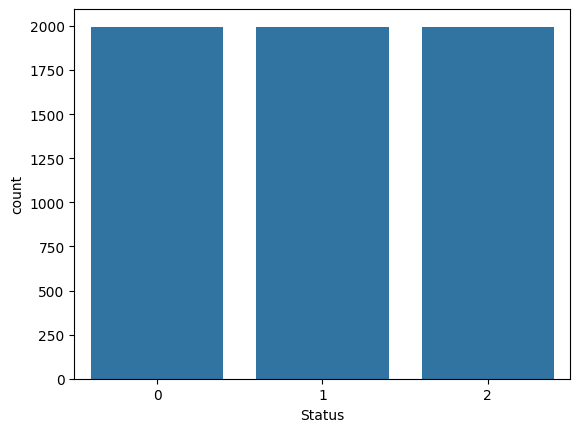

In [88]:
sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

In [89]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [91]:
X_train.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,4,3,0.111111,16,0,15,0.273684,14,9,11,...,0.083333,0.000000,0.217391,0.272727,0.10,0.726923,0.0,0.000000,0.755556,0.578600
1,4,0,0.111111,3,0,15,0.326316,14,16,28,...,0.000000,0.000000,0.304348,0.363636,0.30,0.691026,0.0,0.732558,0.111111,0.640687
2,3,16,0.111111,10,1,16,0.473684,14,10,11,...,0.000000,0.157895,0.304348,0.272727,0.30,0.673077,0.0,0.209302,0.000000,0.124174
3,4,0,0.111111,0,0,15,0.431579,14,9,28,...,0.000000,0.000000,0.260870,0.393939,0.25,0.761538,0.0,0.406977,0.311111,0.803170
4,3,14,0.111111,13,0,15,0.263158,14,10,11,...,0.000000,0.000000,0.260870,0.303030,0.20,0.686538,0.0,0.151163,0.488889,1.000000


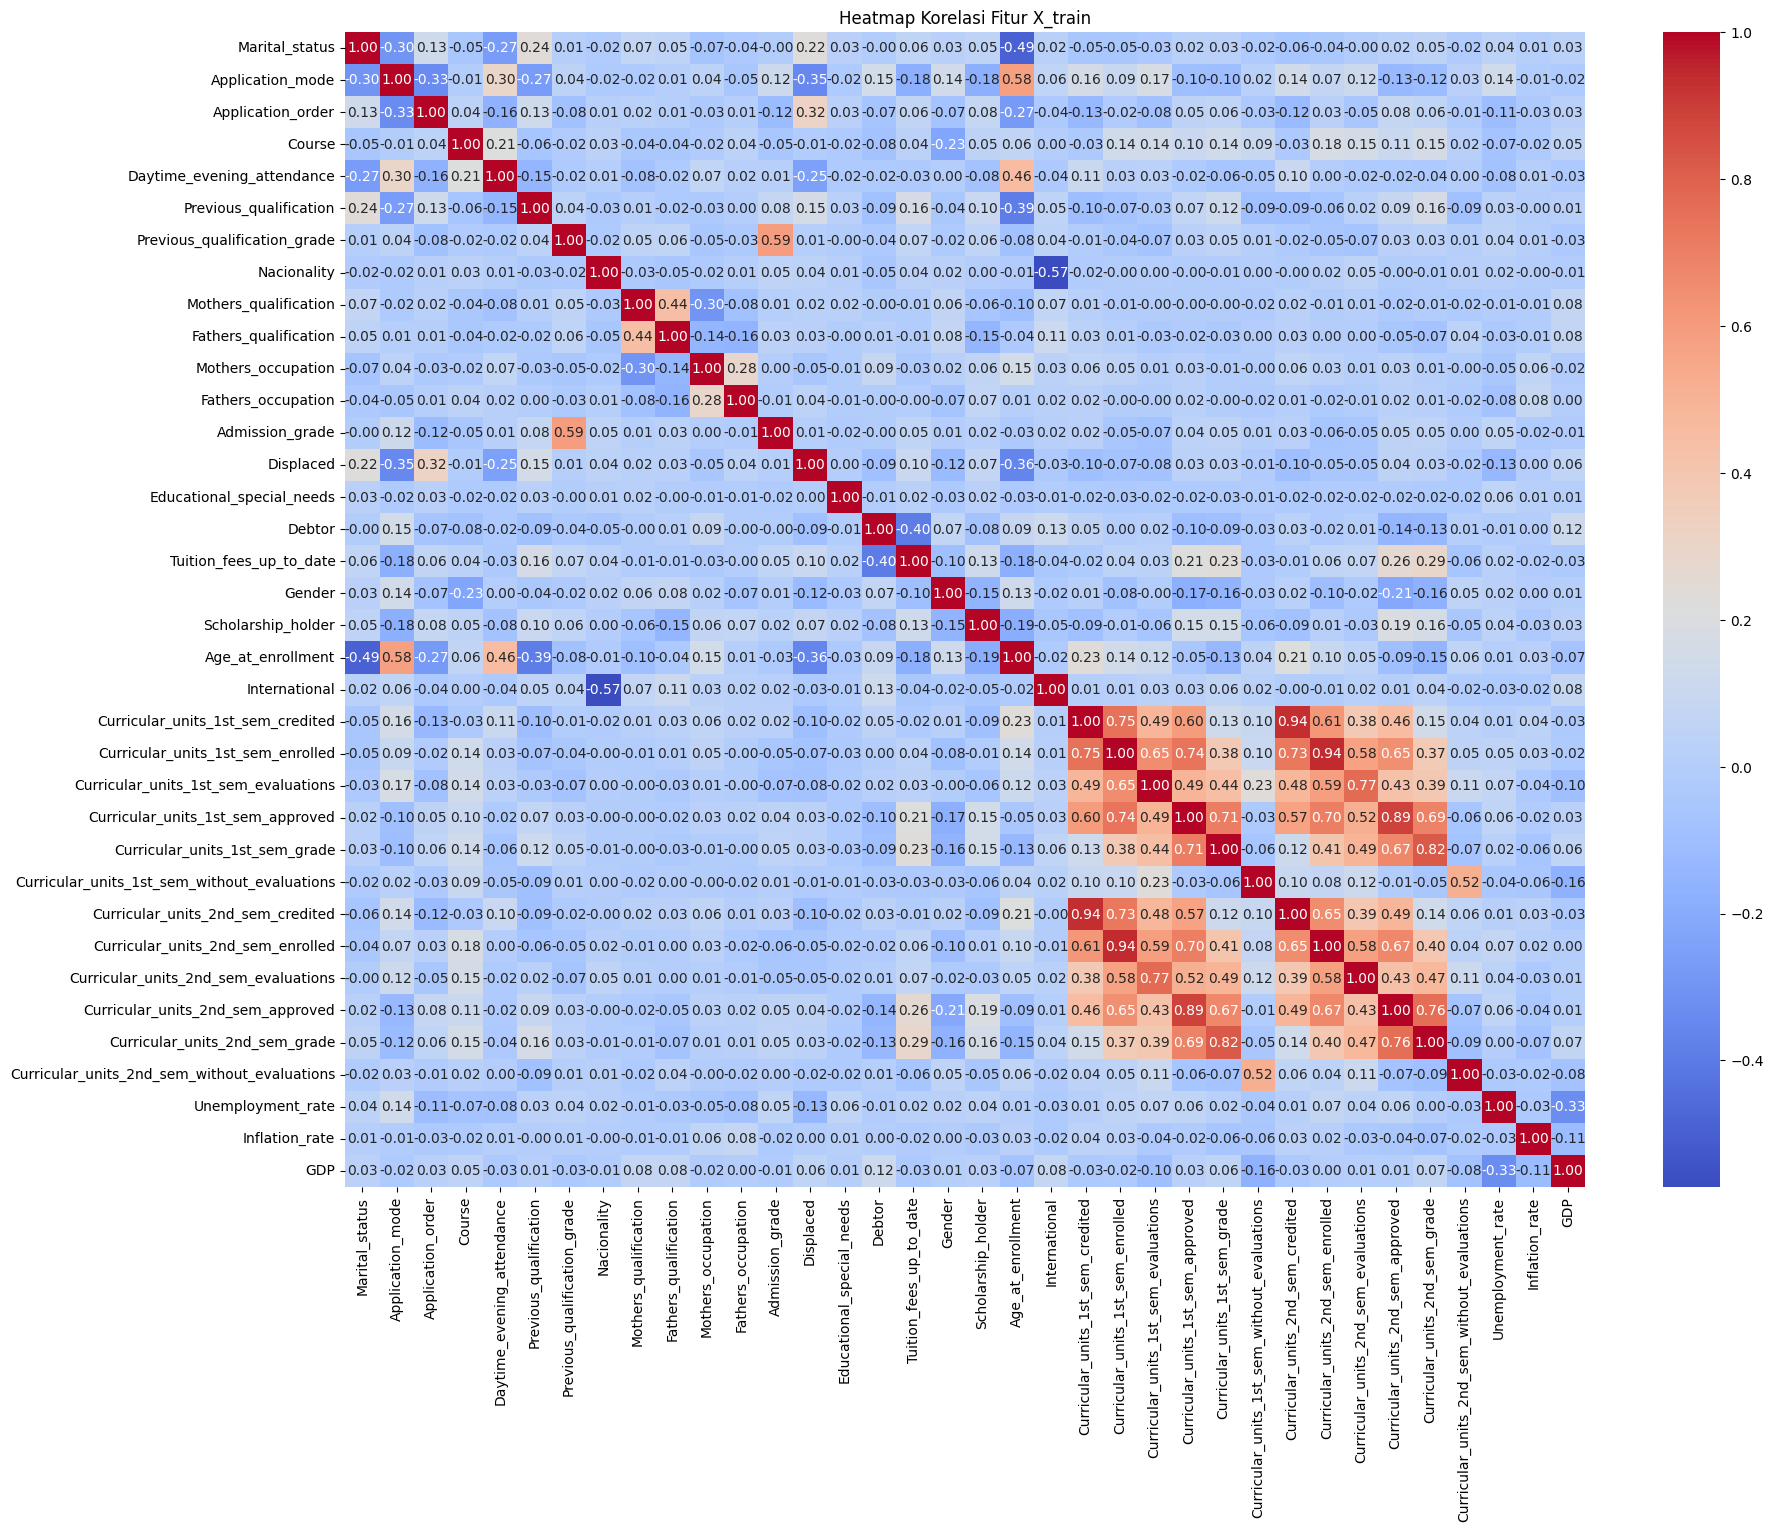

In [90]:
# Hitung matriks korelasi
corr_matrix = X_train.corr()

# Buat heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur X_train')
plt.show()

In [92]:
pca_numerical_columns = [
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

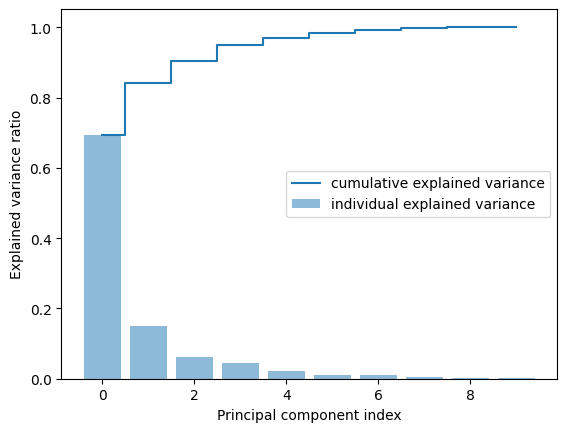

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns), random_state=123)
pca.fit(X_train[pca_numerical_columns])
princ_comp = pca.transform(X_train[pca_numerical_columns])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [94]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(X_train[pca_numerical_columns])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(X_train[pca_numerical_columns])
X_train[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
X_train.drop(columns=pca_numerical_columns, axis=1, inplace=True)
X_train.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,4,3,0.111111,16,0,15,0.273684,14,9,11,...,0.083333,0.0,0.000000,0.755556,0.578600,-0.273519,-0.019717,-0.385660,0.394304,0.038549
1,4,0,0.111111,3,0,15,0.326316,14,16,28,...,0.000000,0.0,0.732558,0.111111,0.640687,0.184229,0.018511,-0.053813,0.098948,-0.085606
2,3,16,0.111111,10,1,16,0.473684,14,10,11,...,0.000000,0.0,0.209302,0.000000,0.124174,0.202099,0.064756,-0.037999,-0.006428,0.067954
3,4,0,0.111111,0,0,15,0.431579,14,9,28,...,0.000000,0.0,0.406977,0.311111,0.803170,0.290752,-0.067425,0.020741,0.105151,-0.011047
4,3,14,0.111111,13,0,15,0.263158,14,10,11,...,0.000000,0.0,0.151163,0.488889,1.000000,0.174380,-0.080910,-0.003083,0.028515,0.001217


In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5988 entries, 0 to 5987
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                5988 non-null   int64  
 1   Application_mode                              5988 non-null   int64  
 2   Application_order                             5988 non-null   float64
 3   Course                                        5988 non-null   int64  
 4   Daytime_evening_attendance                    5988 non-null   int64  
 5   Previous_qualification                        5988 non-null   int64  
 6   Previous_qualification_grade                  5988 non-null   float64
 7   Nacionality                                   5988 non-null   int64  
 8   Mothers_qualification                         5988 non-null   int64  
 9   Fathers_qualification                         5988 non-null   i

In [95]:
test_princ_comp_1 = pca_1.transform(X_test[pca_numerical_columns])
X_test[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
X_test.drop(columns=pca_numerical_columns, axis=1, inplace=True)

In [96]:
X_test.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0,14,0.111111,6,0,15,0.401053,14,16,28,...,0.0,0.0,0.406977,0.311111,0.803170,-0.371499,0.087483,-0.210049,0.450720,-0.030671
1,4,3,0.111111,13,0,15,0.315789,14,19,20,...,0.0,0.0,1.000000,0.244444,0.414795,0.144813,-0.053493,-0.051273,-0.008019,-0.040320
2,4,3,0.111111,3,0,15,0.400000,14,8,9,...,0.0,0.0,1.000000,0.244444,0.414795,0.217607,-0.032982,-0.058958,-0.099562,-0.087966
3,4,3,0.222222,0,0,15,0.157895,14,24,28,...,0.0,0.0,0.918605,0.800000,0.000000,0.237336,-0.104387,0.009010,-0.043104,-0.001156
4,4,14,0.111111,11,0,15,0.368421,14,10,10,...,0.0,0.0,0.406977,0.311111,0.803170,-0.719244,0.281946,0.113589,0.283697,-0.124732


## Modeling

## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [98]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [99]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=8,
    max_features='sqrt'
)

tree_model.fit(X_train, y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [101]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [102]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=200,
    max_features='sqrt',
    criterion='entropy',
    n_jobs=-1
)
rdf_model.fit(X_train, y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Evaluation

In [103]:
encoder_loaded = joblib.load("model/encoder_Status.joblib")

# Ambil data yang sudah di-encode dari DataFrame
data_encoded_contoh = df_new['Status'].head().values

# Lakukan inverse transform untuk mendapatkan label asli
label_asli = encoder_loaded.inverse_transform(data_encoded_contoh)
print(f"\nData encoded untuk 'Status' (5 baris pertama): {data_encoded_contoh}")
print(f"Label asli setelah inverse transform: {label_asli}")


Data encoded untuk 'Status' (5 baris pertama): [0 2 0 2 2]
Label asli setelah inverse transform: ['Dropout' 'Graduate' 'Dropout' 'Graduate' 'Graduate']


In [104]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Dropout', 'Enrolled', 'Graduate']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

In [105]:
y_pred_test = tree_model.predict(X_test)
y_pred_test = encoder_loaded.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.73      0.63      0.67       147
    Enrolled       0.36      0.60      0.45        83
    Graduate       0.81      0.68      0.74       213

    accuracy                           0.65       443
   macro avg       0.63      0.63      0.62       443
weighted avg       0.70      0.65      0.66       443



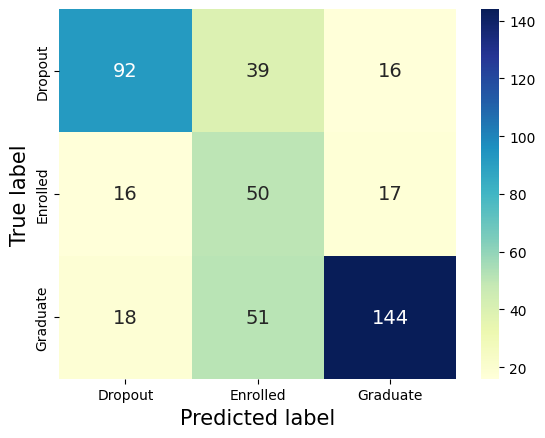

,Dropout,Enrolled,Graduate
Dropout,92,39,16
Enrolled,16,50,17
Graduate,18,51,144


In [106]:
evaluating(y_pred=y_pred_test, y_true=encoder_loaded.inverse_transform(y_test))

In [107]:
y_pred_test = rdf_model.predict(X_test)
y_pred_test = encoder_loaded.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.89      0.74      0.81       147
    Enrolled       0.46      0.63      0.53        83
    Graduate       0.83      0.80      0.81       213

    accuracy                           0.75       443
   macro avg       0.72      0.72      0.72       443
weighted avg       0.78      0.75      0.76       443



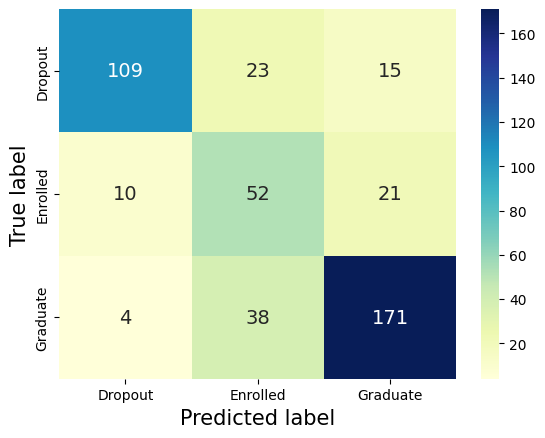

,Dropout,Enrolled,Graduate
Dropout,109,23,15
Enrolled,10,52,21
Graduate,4,38,171


In [108]:
evaluating(y_pred=y_pred_test, y_true=encoder_loaded.inverse_transform(y_test))

In [109]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']